In [1]:
import pandas as pd
import numpy as np

In [3]:
s = pd.Series([0,1,4,9,16, 25], name = 'squeares')

print(s.index)
print(s.values, s.index)
print(s[2:4])

RangeIndex(start=0, stop=6, step=1)
[ 0  1  4  9 16 25] RangeIndex(start=0, stop=6, step=1)
2    4
3    9
Name: squeares, dtype: int64


In [22]:
pop2014 = pd.Series([100,93.3,99.1],
                   index = ['Java', 'C', 'C++'])

print(pop2014) #index sort
#exit()

pop2015 = pd.Series({'Java': 100, 'C':99.3, 'C++':99.5})

print(pop2015)

Java    100.0
C        93.3
C++      99.1
dtype: float64
Java    100.0
C        99.3
C++      99.5
dtype: float64


In [23]:
print(pop2014.index)
print(pop2014.iloc[0:2])#dataframe er actuial index from 0
print(pop2014.loc[:'C++']) # je index amra push korbo seta
#C++ er age prjnto
#ix loc er moto kaj kore kintu index na dile iloc er moto kaj kore

Index(['Java', 'C', 'C++'], dtype='object')
Java    100.0
C        93.3
dtype: float64
Java    100.0
C        93.3
C++      99.1
dtype: float64


In [25]:
twoyears = pd.DataFrame({'2014': pop2014, '2015': pop2015})
print(twoyears)

       2014   2015
Java  100.0  100.0
C      93.3   99.3
C++    99.1   99.5


In [26]:
twoyears['Average'] = 0.5*(twoyears['2014'] + twoyears['2015'])
print(twoyears)

       2014   2015  Average
Java  100.0  100.0    100.0
C      93.3   99.3     96.3
C++    99.1   99.5     99.3


In [31]:
test_data = pd.DataFrame(np.random.choice(['a','b', 'c', 'd'],(3,3)), index = [1,2,3], columns = ['AA', 'BB', 'CC', ])
print(test_data)

  AA BB CC
1  b  a  b
2  b  d  d
3  b  a  a


# Pandas aggregation

In [32]:
open('tips.csv','r').readlines()[:10]

['total_bill,tip,gender,smoker,day,time,size\n',
 '16.99,1.01,Female,No,Sun,Dinner,2\n',
 '10.34,1.66,Male,No,Sun,Dinner,3\n',
 '21.01,3.5,Male,No,Sun,Dinner,3\n',
 '23.68,3.31,Male,No,Sun,Dinner,2\n',
 '24.59,3.61,Female,No,Sun,Dinner,4\n',
 '25.29,4.71,Male,No,Sun,Dinner,4\n',
 '8.77,2,Male,No,Sun,Dinner,2\n',
 '26.88,3.12,Male,No,Sun,Dinner,4\n',
 '15.04,1.96,Male,No,Sun,Dinner,2\n']

In [33]:
tips = pd.read_csv('tips.csv')

In [42]:
tips.head(10)
#print("comes")
#tips.tail(10)

comes


,total_bill,tip,gender,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [55]:
#print(tips)
#tips.head(10)


,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [43]:
tips.shape

(244, 7)

In [51]:
#tips.mean
tips.dtypes


total_bill    float64
tip           float64
gender         object
smoker         object
day            object
time           object
size            int64
dtype: object

In [50]:
tips.describe()
#tips.describe

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [52]:
tips.groupby('gender').mean()

,total_bill,tip,size
gender,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [56]:
tips.groupby(['gender', 'smoker']).mean()

total_bill       tip      size
gender smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

In [57]:
pd.pivot_table(tips,'total_bill','gender','smoker')

smoker,No,Yes
gender,,
Female,18.105185,17.977879
Male,19.791237,22.284500


In [59]:
pd.pivot_table(tips,'total_bill',['gender','smoker'], ['day','time'])
# gender, smoker - row

day               Fri                   Sat        Sun   Thur           
time           Dinner      Lunch     Dinner     Dinner Dinner      Lunch
gender smoker                                                           
Female No      22.750  15.980000  19.003846  20.824286  18.78  15.899167
       Yes     12.200  13.260000  20.266667  16.540000    NaN  19.218571
Male   No      17.475        NaN  19.929063  20.403256    NaN  18.486500
       Yes     25.892  11.386667  21.837778  26.141333    NaN  19.171000

# data frame creation and visulatizion

In [60]:
import pandas as pd
from matplotlib import pyplot as plt

In [63]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url)
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [65]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','flower_type',]
df['flower_type'] = df['flower_type'].astype('category')
df.flower_type = df.flower_type.cat.rename_categories([0,1,2])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_type
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [66]:
df['flower_type'].describe()

count     149
unique      3
top         2
freq       50
Name: flower_type, dtype: int64

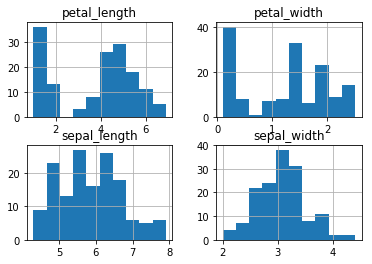

In [67]:
df.hist()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


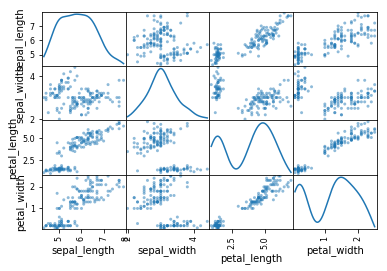

In [68]:
pd.scatter_matrix(df, diagonal = 'kde')
plt.show()

In [ ]:
df.to_csv('iris_normalized>csv')
new_df

#write csv
#DEAL WITH MISSING DATA
#df.fillna(0)
#df.dropna()

In [69]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
import numpy as np
def latlong_distance(loc, p):
    return lambda x : x+p
loc_lat = [1.123, 2.34, 3.56]
loc_lon = [1.06, 2.11, 3.12]
#loc_latlon = loc_lat * loc_lon
loc1 = np.array(loc_lat)
loc2 = np.array(loc_lon)
loc_final = np.arange(2)
print(loc_final)

[0 1]


## 